In [1]:
from glob import glob
import pandas as pd
import os

# 📂 Paths base
train_path_dir = '/data/cristian/projects/med_data/rise-miccai/task-2/'
test_path_dir  = '/data/cristian/projects/med_data/rise-miccai/task-2-val/'

# 📥 Archivos
train_list_paths       = glob(os.path.join(train_path_dir, '**/*_ciso.nii.gz'), recursive=True)
test_list_paths        = glob(os.path.join(test_path_dir, '**/*_ciso.nii.gz'), recursive=True)
train_y_list_paths_2a  = glob(os.path.join(train_path_dir, '**/*HF_hipp.nii.gz'), recursive=True)
train_y_list_paths_2b  = glob(os.path.join(train_path_dir, '**/*HF_baga.nii.gz'), recursive=True)

extra_paths_hipp       = glob(os.path.join(train_path_dir, '**/*LF_hipp.nii.gz'), recursive=True)
extra_paths_baga       = glob(os.path.join(train_path_dir, '**/*LF_baga.nii.gz'), recursive=True)
extra_paths_vent       = glob(os.path.join(train_path_dir, '**/*_vent.nii.gz'), recursive=True)

In [2]:
test_all_list_paths = glob(os.path.join(test_path_dir, '**/*.nii.gz'), recursive=True)
len(test_all_list_paths)
df_test_all = pd.DataFrame({'filename': test_all_list_paths})
df_test_all.head(2)

,filename
0,/data/cristian/projects/med_data/rise-miccai/t...
1,/data/cristian/projects/med_data/rise-miccai/t...


In [3]:
df_test_all[df_test_all['filename'].str.contains('0001')].head(20)

,filename
0,/data/cristian/projects/med_data/rise-miccai/t...


In [4]:
all_list_paths = glob(os.path.join(train_path_dir, '**/*.nii.gz'), recursive=True)
len(all_list_paths)

474

In [5]:
#limit of pandas display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df_all = pd.DataFrame({'filename': all_list_paths})
df_all[df_all['filename'].str.contains('LISA_0001')].head(20)

,filename
1,/data/cristian/projects/med_data/rise-miccai/task-2/960/155887960/LISA_0001_HF_hipp.nii.gz
98,/data/cristian/projects/med_data/rise-miccai/task-2/49/155888049/LISA_0001_HF_baga.nii.gz
188,/data/cristian/projects/med_data/rise-miccai/task-2/704/155887704/LISA_0001_vent.nii.gz
217,/data/cristian/projects/med_data/rise-miccai/task-2/735/155885735/LISA_0001_ciso.nii.gz
341,/data/cristian/projects/med_data/rise-miccai/task-2/879/155887879/LISA_0001_LF_hipp.nii.gz
430,/data/cristian/projects/med_data/rise-miccai/task-2/790/155887790/LISA_0001_LF_baga.nii.gz


In [6]:
df_all[df_all["filename"].str.contains("LISA_1016")].head(10)

,filename
97,/data/cristian/projects/med_data/rise-miccai/task-2/42/155888042/LISA_1016_HF_hipp.nii.gz
176,/data/cristian/projects/med_data/rise-miccai/task-2/954/155887954/LISA_1016_LF_hipp.nii.gz
185,/data/cristian/projects/med_data/rise-miccai/task-2/120/155888120/LISA_1016_HF_baga.nii.gz
276,/data/cristian/projects/med_data/rise-miccai/task-2/789/155887789/LISA_1016_vent.nii.gz
337,/data/cristian/projects/med_data/rise-miccai/task-2/868/155887868/LISA_1016_LF_baga.nii.gz
369,/data/cristian/projects/med_data/rise-miccai/task-2/902/155885902/LISA_1016_ciso.nii.gz


In [7]:
import nibabel as nib
import numpy as np

data_01 = nib.load("/data/cristian/projects/med_data/rise-miccai/task-2/42/155888042/LISA_1016_HF_hipp.nii.gz").get_fdata()
data_02 = nib.load("/data/cristian/projects/med_data/rise-miccai/task-2/954/155887954/LISA_1016_LF_hipp.nii.gz").get_fdata()
print(np.sum(data_01-data_02))
data_01 = nib.load("/data/cristian/projects/med_data/rise-miccai/task-2/120/155888120/LISA_1016_HF_baga.nii.gz").get_fdata()
data_02 = nib.load("/data/cristian/projects/med_data/rise-miccai/task-2/868/155887868/LISA_1016_LF_baga.nii.gz").get_fdata()
print(np.sum(data_01-data_02))

0.0
1353.0


In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_5_slices(filepath, axis=2):
    """
    Muestra 5 cortes igualmente espaciados de un volumen 3D NIfTI.
    
    Parámetros:
    filepath (str): Ruta del archivo .nii.gz
    axis (int): Eje sobre el cual cortar (0=sagital, 1=coronal, 2=axial)
    """
    img = nib.load(filepath).get_fdata()
    img = np.asarray(img)

    # índices de los 5 cortes (0/5, 1/5, 2/5, 3/5, 4/5 → cerca de los extremos y el medio)
    indices = [int(img.shape[axis] * frac) for frac in [0, 0.25, 0.5, 0.75, 0.99]]

    plt.figure(figsize=(15, 4))
    for i, idx in enumerate(indices):
        if axis == 0:
            slice_ = img[idx, :, :]
        elif axis == 1:
            slice_ = img[:, idx, :]
        else:
            slice_ = img[:, :, idx]
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(slice_.T, cmap="gray", origin="lower")
        plt.title(f"{axis}-slice {idx}")
        plt.axis("off")

    plt.suptitle(f"""axis : {axis} filepath: {filepath.split("/")[-1]}""")
    plt.show()

In [9]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

def show_nonzero_slices(filepath, axis=2, n_slices=5):
    """
    Muestra n_slices de un volumen NIfTI en un eje.
    Prioriza cortes con valores != 0, si no hay suficientes usa proporcionales.

    Parámetros:
    filepath (str): Ruta del archivo .nii.gz
    axis (int): Eje de corte (0=sagital, 1=coronal, 2=axial)
    n_slices (int): Número de cortes a mostrar
    """
    img = nib.load(filepath).get_fdata()
    img = np.asarray(img)

    # Buscar slices con contenido ≠ 0
    nonzero_indices = []
    for i in range(img.shape[axis]):
        if axis == 0:
            sl = img[i, :, :]
        elif axis == 1:
            sl = img[:, i, :]
        else:
            sl = img[:, :, i]
        if np.any(sl != 0):
            nonzero_indices.append(i)

    # Elegir índices
    if len(nonzero_indices) >= n_slices:
        # distribuir n_slices dentro de los índices válidos
        idxs = np.linspace(0, len(nonzero_indices)-1, n_slices).astype(int)
        indices = [nonzero_indices[i] for i in idxs]
    else:
        # fallback: usar proporcionales
        indices = [int(img.shape[axis] * frac) for frac in np.linspace(0, 1, n_slices)]

    indices = [ 70, 71, 72, 73, 74]
    # Plot
    plt.figure(figsize=(15, 4))
    for j, idx in enumerate(indices):
        if axis == 0:
            slice_ = img[idx, :, :]
        elif axis == 1:
            slice_ = img[:, idx, :]
        else:
            slice_ = img[:, :, idx]

        plt.subplot(1, n_slices, j + 1)
        plt.imshow(slice_.T, cmap="gray", origin="lower")
        plt.title(f"{axis}-slice {idx}")
        plt.axis("off")

    plt.suptitle(filepath.split("/")[-1])
    plt.show()


********************
filename: /data/cristian/projects/med_data/rise-miccai/task-2/20/155888020/LISA_0058_HF_hipp.nii.gz
(197, 233, 189)


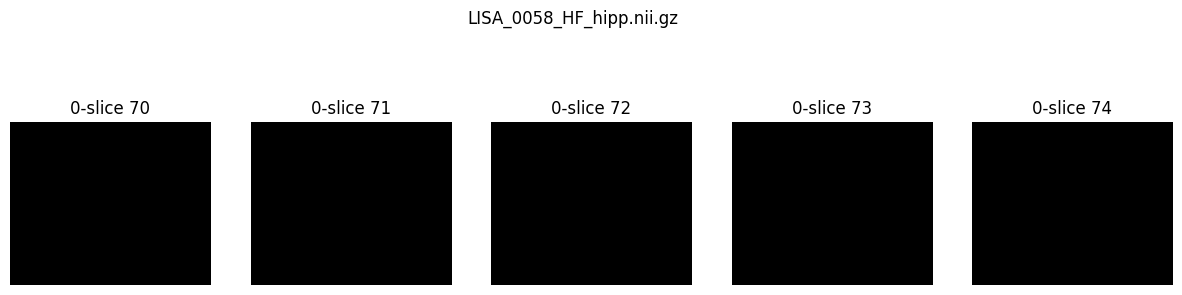

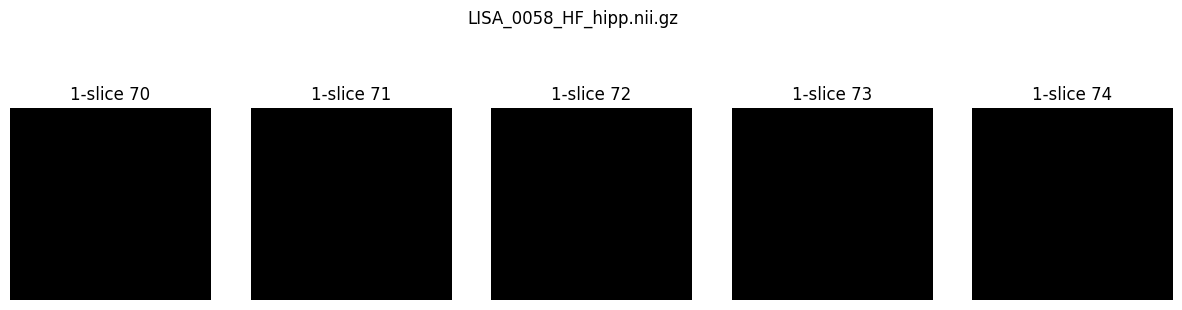

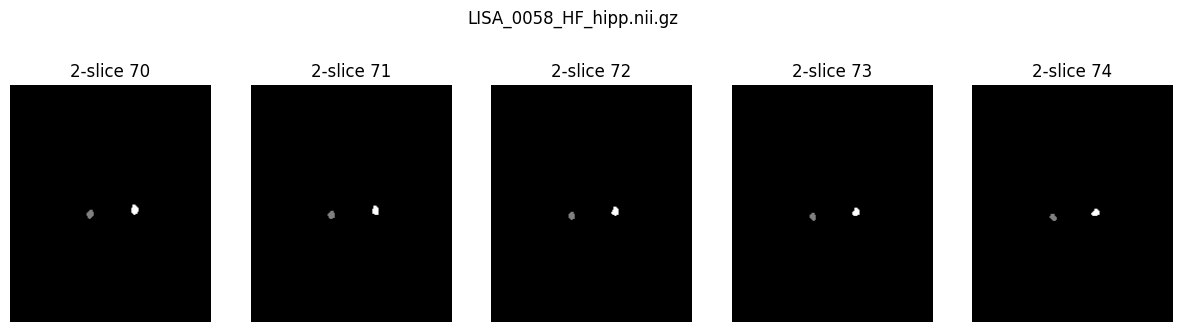

********************
filename: /data/cristian/projects/med_data/rise-miccai/task-2/99/155888099/LISA_0058_HF_baga.nii.gz
(197, 233, 189)


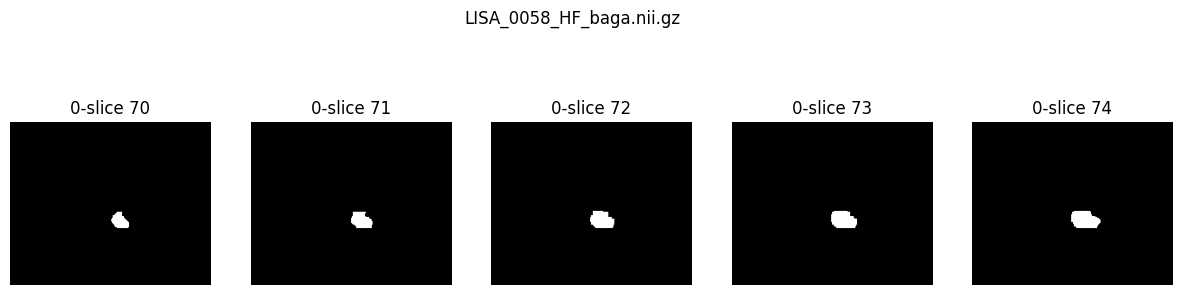

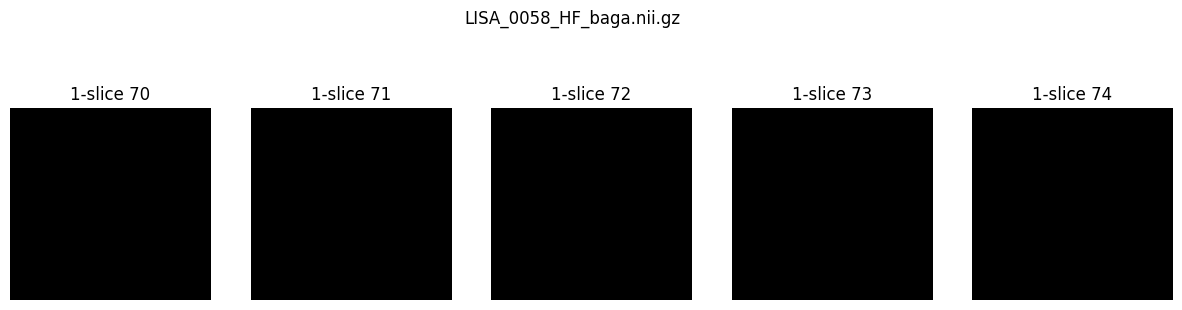

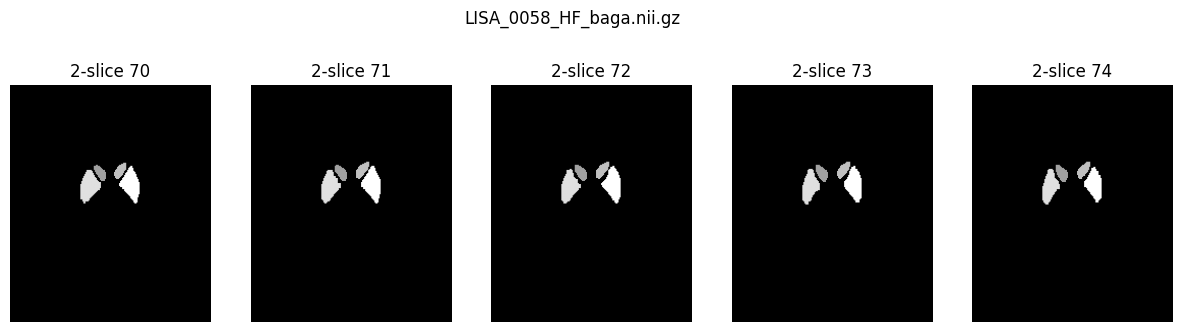

********************
filename: /data/cristian/projects/med_data/rise-miccai/task-2/769/155887769/LISA_0058_vent.nii.gz
(197, 233, 189)


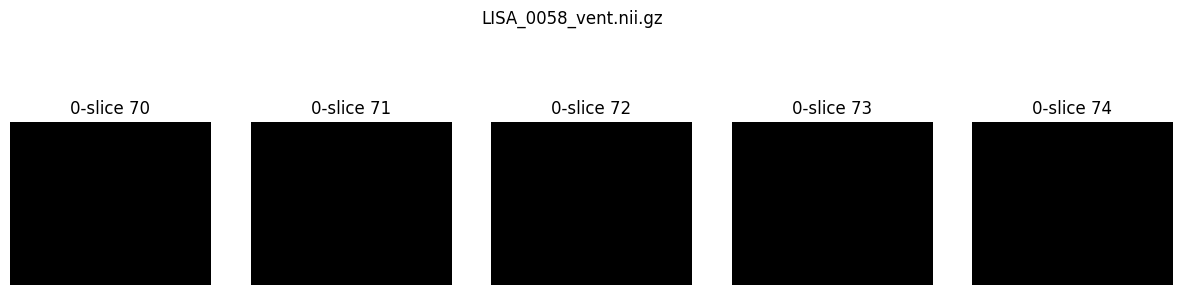

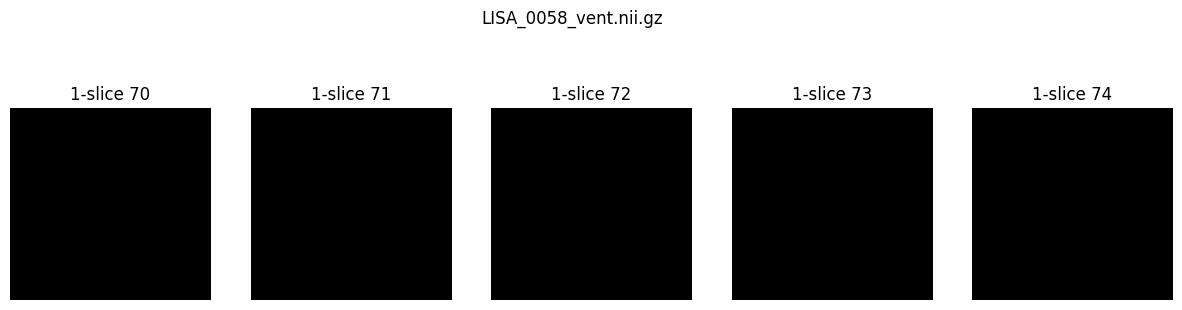

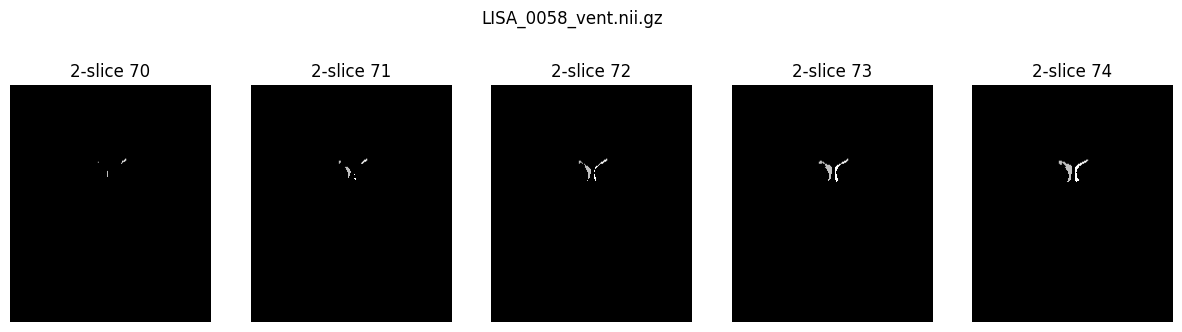

********************
filename: /data/cristian/projects/med_data/rise-miccai/task-2/863/155885863/LISA_0058_ciso.nii.gz
(197, 233, 189)


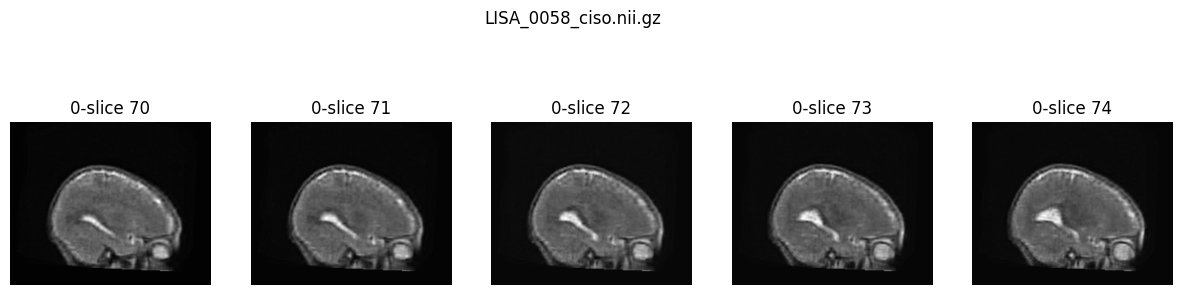

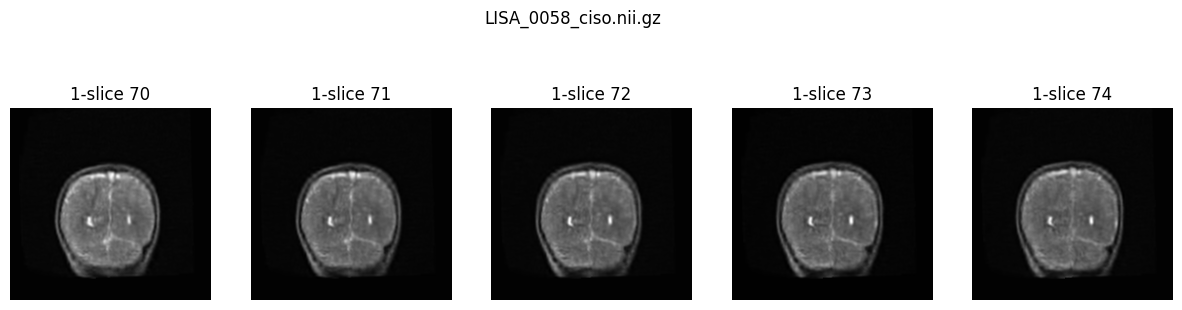

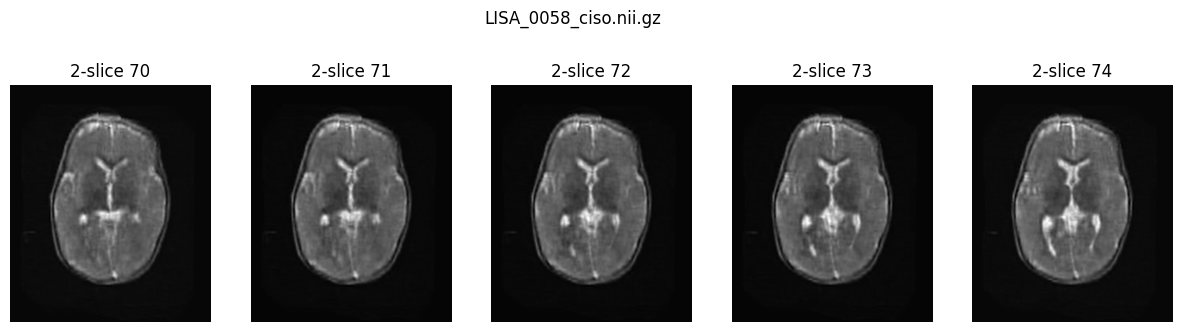

********************
filename: /data/cristian/projects/med_data/rise-miccai/task-2/934/155887934/LISA_0058_LF_hipp.nii.gz
(197, 233, 189)


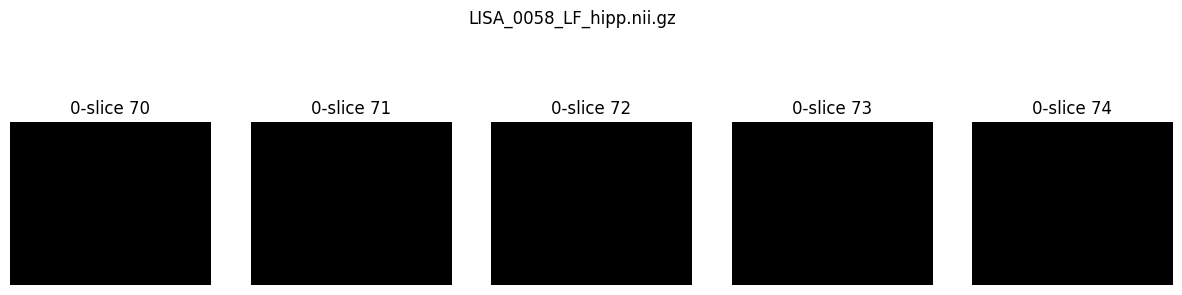

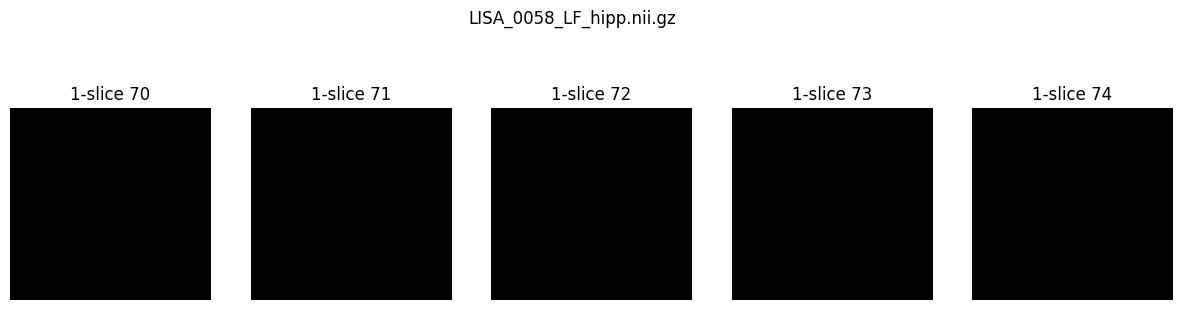

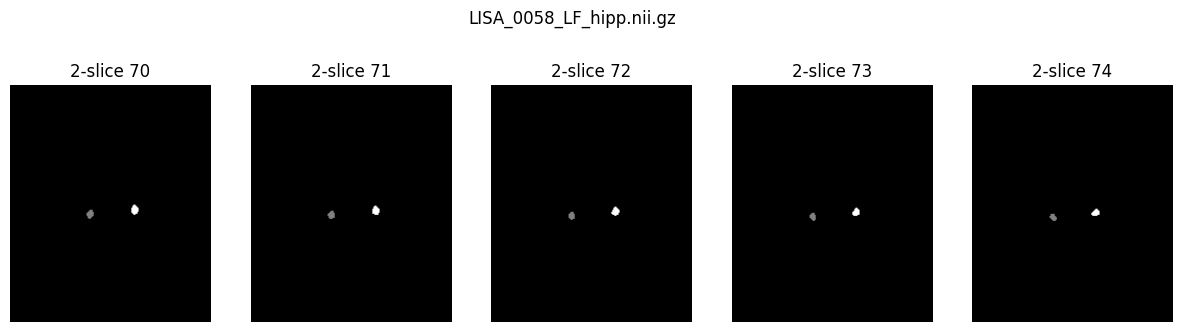

********************
filename: /data/cristian/projects/med_data/rise-miccai/task-2/846/155887846/LISA_0058_LF_baga.nii.gz
(197, 233, 189)


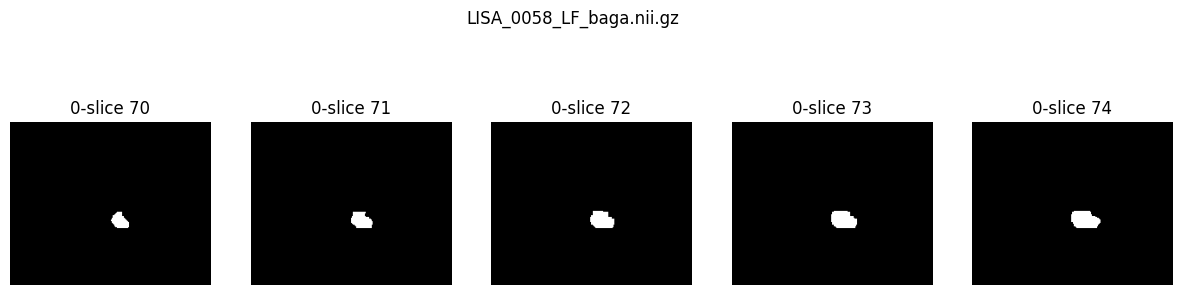

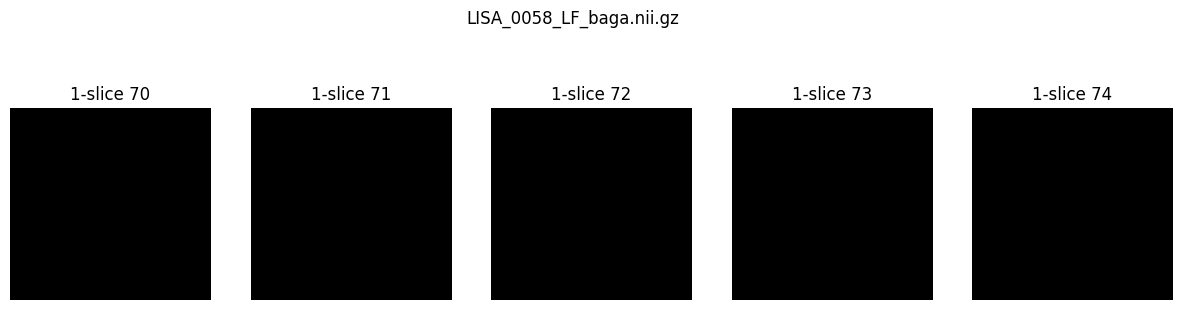

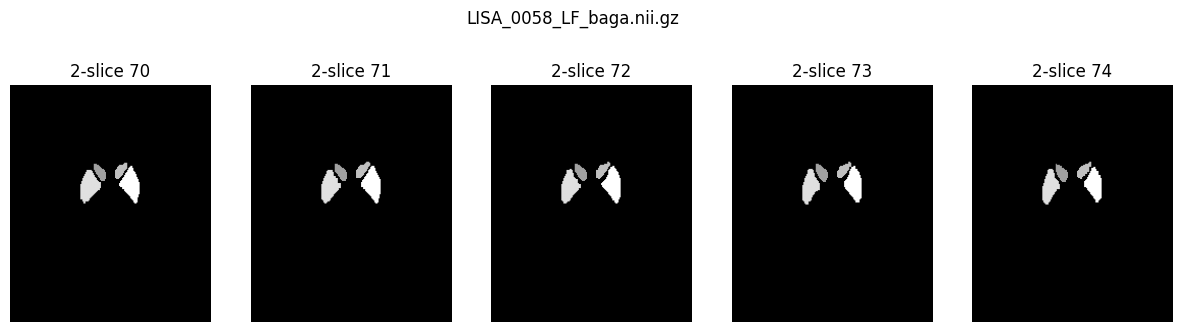

In [10]:
import nibabel as nib
import numpy as np
from tqdm import tqdm

df_subset = df_all[df_all["filename"].str.contains("LISA_1016")].reset_index(drop=True)
df_subset = df_all[df_all["filename"].str.contains("LISA_0058")].reset_index(drop=True)

for idx in range(len(df_subset)):
  path = df_subset["filename"].iloc[idx]
  data = nib.load(path).get_fdata()
  print("*"*20)
  print(f"filename: {path}")
  print(data.shape)
  #show_5_slices(path, axis=0)   # eje axial
  #show_5_slices(path, axis=1)   # eje axial
  #show_5_slices(path, axis=2)   # eje axial
  show_nonzero_slices(path, axis=0, n_slices=5)
  show_nonzero_slices(path, axis=1, n_slices=5)
  show_nonzero_slices(path, axis=2, n_slices=5)




In [11]:
all_list_paths[:10]

['/data/cristian/projects/med_data/rise-miccai/task-2/50/155888050/LISA_0003_HF_baga.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/960/155887960/LISA_0001_HF_hipp.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/963/155887963/LISA_0005_HF_hipp.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/962/155887962/LISA_0002_HF_hipp.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/966/155887966/LISA_0010_HF_hipp.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/961/155887961/LISA_0003_HF_hipp.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/958/155887958/LISA_0006_HF_hipp.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/959/155887959/LISA_0004_HF_hipp.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/957/155887957/LISA_0007_HF_hipp.nii.gz',
 '/data/cristian/projects/med_data/rise-miccai/task-2/94/155888094/LISA_0051_HF_baga.nii.gz']

In [12]:


# ✅ Función auxiliar
def build_df(paths, categoria):
    df = pd.DataFrame(paths, columns=['filepath'])
    df['filename'] = df['filepath'].apply(lambda x: os.path.basename(x))
    if "VALIDATION" in df['filename'].iloc[0]:
      df['ID'] = df['filename'].apply(lambda x: "_".join(x.split("_")[:3])) #lambda x: x.split('/')[-1].split(".nii.gz")[0])
    else:
      df['ID'] = df['filename'].apply(lambda x: "_".join(x.split("_")[:2])) #lambda x: x.split('/')[-1].split(".nii.gz")[0])
        
    df['source'] = categoria
    return df



def add_voxel_counts(df, label_range=range(1, 9)):
    """
    Adds columns 'class_1', ..., 'class_8' with voxel counts for each file.
    """
    for cls in label_range:
        df[f'class_{cls}'] = 0

    print(f"🧠 Counting voxels per class in {len(df)} segmentations...")
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        data = nib.load(row['filepath']).get_fdata()
        unique, counts = np.unique(data, return_counts=True)
        for u, c in zip(unique, counts):
            if int(u) in label_range:
                df.at[idx, f'class_{int(u)}'] = int(c)
            else:
                df[f'class_{int(u)}'] = 0
                df.at[idx, f'class_{int(u)}'] = int(c)
    return df


# 📊 Construcción de DataFrames
df_train          = build_df(train_list_paths, categoria='ciso')
df_test           = build_df(test_list_paths, categoria='ciso')
df_train_target2a = build_df(train_y_list_paths_2a, categoria='HF_hipp')
df_train_target2b = build_df(train_y_list_paths_2b, categoria='HF_baga')
df_extra_data     = pd.concat([
    build_df(extra_paths_hipp, categoria='LF_hipp'),
    build_df(extra_paths_baga, categoria='LF_baga'),
    build_df(extra_paths_vent, categoria='ventricle')
], ignore_index=True)

# 📁 Guardar
results_dir = '../results/preprocessed_data/task2/'
os.makedirs(results_dir, exist_ok=True)

df_train.to_csv(os.path.join(results_dir, 'df_train.csv'), index=False)
df_test.to_csv(os.path.join(results_dir, 'df_test.csv'), index=False)


# ✅ Aplicar a los dataframes relevantes
df_train_target2a = add_voxel_counts(df_train_target2a)
df_train_target2b = add_voxel_counts(df_train_target2b)
df_extra_data     = add_voxel_counts(df_extra_data)

# 💾 Guardar con las nuevas columnas
df_train_target2a.to_csv(os.path.join(results_dir, 'df_train_target2a.csv'), index=False)
df_train_target2b.to_csv(os.path.join(results_dir, 'df_train_target2b.csv'), index=False)
df_extra_data.to_csv(os.path.join(results_dir, 'df_extra_data.csv'), index=False)

# ✅ Confirmación
print("✅ Added voxel class counts to segmentations:")
#print(df_train_target2a.head(1)[['filename'] + [f'class_{i}' for i in range(1, 9)]])
#print(df_train_target2b.head(1)[['filename'] + [f'class_{i}' for i in range(1, 9)]])
#print(df_extra_data.head(1)[['filename', 'categoria'] + [f'class_{i}' for i in range(1, 9)]])


# ✅ Mostrar formas
print("✅ Shapes:")
print("df_train         :", df_train.shape)
print("df_test          :", df_test.shape)
print("df_target2a (hipp):", df_train_target2a.shape)
print("df_target2b (baga):", df_train_target2b.shape)
print("df_extra_data    :", df_extra_data.shape)


🧠 Counting voxels per class in 79 segmentations...


100%|██████████| 79/79 [00:22<00:00,  3.48it/s]


🧠 Counting voxels per class in 79 segmentations...


100%|██████████| 79/79 [00:22<00:00,  3.54it/s]


🧠 Counting voxels per class in 237 segmentations...


100%|██████████| 237/237 [01:13<00:00,  3.21it/s]

✅ Added voxel class counts to segmentations:
✅ Shapes:
df_train         : (79, 4)
df_test          : (12, 4)
df_target2a (hipp): (79, 13)
df_target2b (baga): (79, 13)
df_extra_data    : (237, 13)


In [13]:
df_train.head(1)

,filepath,filename,ID,source
0,/data/cristian/projects/med_data/rise-miccai/task-2/720/155885720/LISA_0008_ciso.nii.gz,LISA_0008_ciso.nii.gz,LISA_0008,ciso


In [14]:
df_extra_data.head(1)

,filepath,filename,ID,source,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_0
0,/data/cristian/projects/med_data/rise-miccai/task-2/954/155887954/LISA_1016_LF_hipp.nii.gz,LISA_1016_LF_hipp.nii.gz,LISA_1016,LF_hipp,858,1023,0,0,0,0,0,0,0


In [15]:
df_train_target2a.head(1)

,filepath,filename,ID,source,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_0
0,/data/cristian/projects/med_data/rise-miccai/task-2/960/155887960/LISA_0001_HF_hipp.nii.gz,LISA_0001_HF_hipp.nii.gz,LISA_0001,HF_hipp,1180,1214,0,0,0,0,0,0,0


In [16]:
df_train_target2b.head(1)

,filepath,filename,ID,source,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_0
0,/data/cristian/projects/med_data/rise-miccai/task-2/50/155888050/LISA_0003_HF_baga.nii.gz,LISA_0003_HF_baga.nii.gz,LISA_0003,HF_baga,0,0,0,0,2629,2994,4547,4310,0


In [17]:
df_train.describe()

,filepath,filename,ID,source
count,79,79,79,79
unique,79,79,79,1
top,/data/cristian/projects/med_data/rise-miccai/task-2/720/155885720/LISA_0008_ciso.nii.gz,LISA_0008_ciso.nii.gz,LISA_0008,ciso
freq,1,1,1,79


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  79 non-null     object
 1   filename  79 non-null     object
 2   ID        79 non-null     object
 3   source    79 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB
